In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class ScratchLinearRegression:
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features, 1)
      パラメータ
    self.loss : 次の形のndarray, shape (num_iter, )
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (num_iter, )
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, no_bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 学習するパラメータ
        self.coef_ = None
        # 損失を記録する配列を用意
        self.loss = np.zeros(num_iter)
        self.val_loss = np.zeros(num_iter)
        
    # 問題1
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        if self.no_bias:
            return X @ self.coef_
        else:
            ones = np.ones((len(X), 1))
            x = np.concatenate((ones, X), axis=1)
            return x @ self.coef_

    # 問題2
    def _gradient_descent(self, X, error):
        """
        最急降下法によるパラメータの更新値計算
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ（説明変数）
        error : 次の形のndarray, shape (n_samples,)
          真値との差
          
        Returns
        -------
          次の形のndarray, shape (n_features + 1 | n_features, )
          更新後のパラメータ
          
        """
        if self.no_bias:
            x = X
        else:
            ones = np.ones((len(X), 1))
            x = np.concatenate((ones, X), axis=1)
        return self.coef_ - (self.lr * (error @ x) / len(X)).reshape((-1, 1))

    # 問題3
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, )
            線形回帰による推定結果
        """
        return self._linear_hypothesis(X).ravel()

    # 問題5
    def _loss_func(self, y_pred, y):
        """
        損失関数
        1/2 スケールの平均二乗誤差

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples, )
          推定した値
        y : 次の形のndarray, shape (n_samples, )
          正解値

        Returns
        ----------
          numpy.float
          損失
        """
        return MSE(y_pred, y) / 2
    
    # 問題6
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        n_features = X.shape[1]
        self.coef_ = np.random.random((n_features if self.no_bias else n_features + 1, 1))
        for i in range(self.iter):
            error = self.predict(X) - y
            self.coef_ = self._gradient_descent(X, error)
            y_pred = self.predict(X)
            self.loss[i] = self._loss_func(y_pred, y)
            if X_val is not None and y_val is not None:
                y_pred_val = self.predict(X_val)
                self.val_loss[i] = self._loss_func(y_pred_val, y_val)
            if self.verbose:
                # verboseをTrueにした際は学習過程を出力
                if X_val is not None and y_val is not None:
                    print("loss:", self.loss[i], "val_loss", self.val_loss[i])
                else:
                    print("loss:", self.loss[i])

In [3]:
# 問題4
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.mean((y_pred - y) ** 2)
    return mse

### 以下で、実際に訓練する

In [4]:
train = pd.read_csv("train.csv", header=0, index_col=0)
print(list(train.columns))
train

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# 特徴量選択
X = train[['YearBuilt', 'TotalBsmtSF', 'GrLivArea']].values
y = train[['SalePrice']].values.ravel()
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (1460, 3)
y.shape: (1460,)


In [6]:
# データの分割
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=0)

In [7]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

訓練する

In [8]:
reg = ScratchLinearRegression(num_iter=200, lr=0.02, verbose=True)
reg.fit(X_train_std, y_train, X_valid_std, y_valid)

loss: 18632041874.912697 val_loss 19079784953.187492
loss: 17874851203.652657 val_loss 18297782499.030636
loss: 17151041996.349125 val_loss 17552432413.97058
loss: 16459068720.756117 val_loss 16841926595.05543
loss: 15797461719.163527 val_loss 16164551293.517351
loss: 15164823242.463112 val_loss 15518681912.503
loss: 14559823704.219793 val_loss 14902778105.773645
loss: 13981198141.91421 val_loss 14315379159.284744
loss: 13427742873.300413 val_loss 13755099638.6733
loss: 12898312336.552313 val_loss 13220625286.72893
loss: 12391816103.556576 val_loss 12710709155.906494
loss: 11907216056.3515 val_loss 12224167961.858103
loss: 11443523717.313105 val_loss 11759878644.824509
loss: 10999797724.254354 val_loss 11316775126.53401
loss: 10575141442.132914 val_loss 10893845251.014194
loss: 10168700703.559774 val_loss 10490127898.431862
loss: 9779661670.767221 val_loss 10104710261.741724
loss: 9407248812.132124 val_loss 9736725276.548424
loss: 9050722986.760906 val_loss 9385349195.171074
loss: 8709

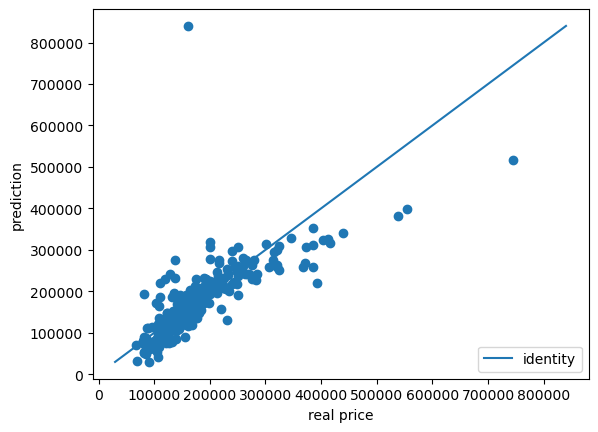

In [9]:
# 検証データをプロット
y_pred = reg.predict(X_valid_std)
plt.scatter(y_valid, y_pred)
plt.xlabel("real price")
plt.ylabel("prediction")
mx = float(max(np.max(y_valid), np.max(y_pred)))
mi = float(min(np.min(y_valid), np.min(y_pred)))
plt.plot([mi, mx], [mi, mx], label="identity")
plt.legend()
plt.show()

#### Scikit-learn と比較

1678648675.0886083


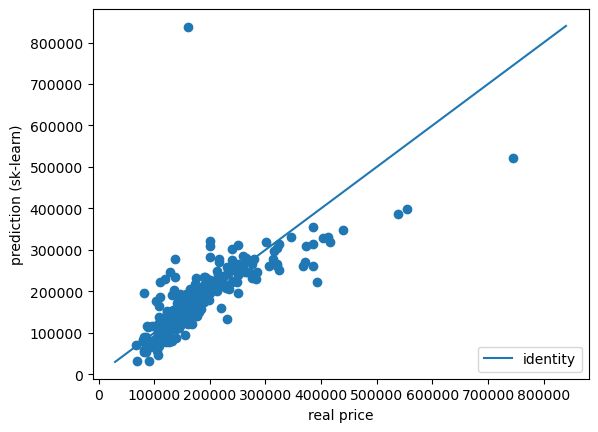

In [10]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()
reg2.fit(X_train_std, y_train)
y_pred_sklearn = reg2.predict(X_valid_std)

plt.scatter(y_valid, y_pred_sklearn)
plt.xlabel("real price")
plt.ylabel("prediction (sk-learn)")
mx = float(max(np.max(y_valid), np.max(y_pred)))
mi = float(min(np.min(y_valid), np.min(y_pred)))
plt.plot([mi, mx], [mi, mx], label="identity")
print(reg.val_loss[-1])
plt.legend()
plt.show()

### 問題7 学習曲線プロット

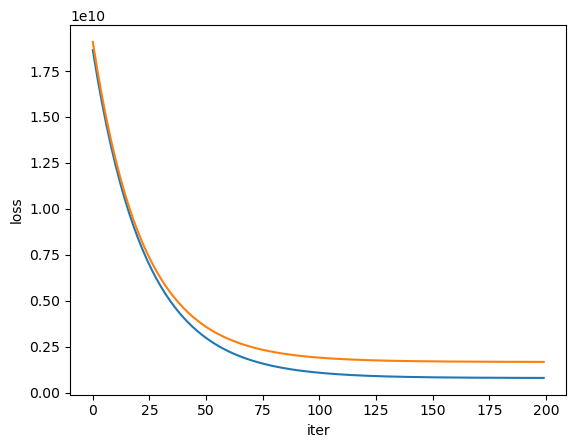

In [11]:
plt.plot(reg.loss)
plt.plot(reg.val_loss)
plt.xlabel("iter")
plt.ylabel("loss")
plt.show()

### 【問題8】（アドバンス課題）バイアス項の除去

17901051435.44882


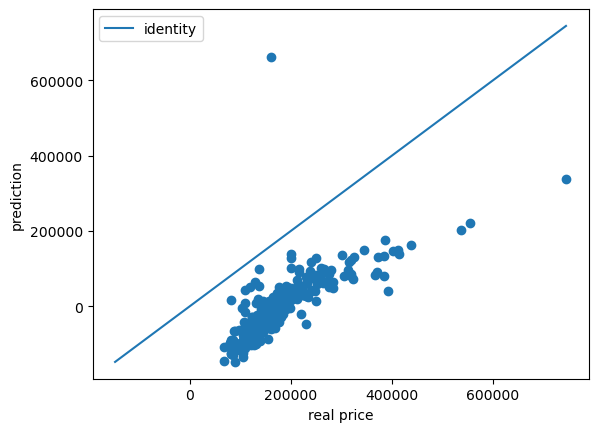

In [12]:
reg = ScratchLinearRegression(num_iter=200, lr=0.02, no_bias=True)
reg.fit(X_train_std, y_train, X_valid_std, y_valid)
y_pred = reg.predict(X_valid_std)
plt.scatter(y_valid, y_pred)
plt.xlabel("real price")
plt.ylabel("prediction")
mx = float(max(np.max(y_valid), np.max(y_pred)))
mi = float(min(np.min(y_valid), np.min(y_pred)))
plt.plot([mi, mx], [mi, mx], label="identity")
print(reg.val_loss[-1])
plt.legend()
plt.show()

バイアス項を除去しても、予測分布の形状は変わらないが、すべての予測結果に一定量のずれが起きてしまっている。

### 【問題9】（アドバンス課題）特徴量の高次元化

2702829931.135818


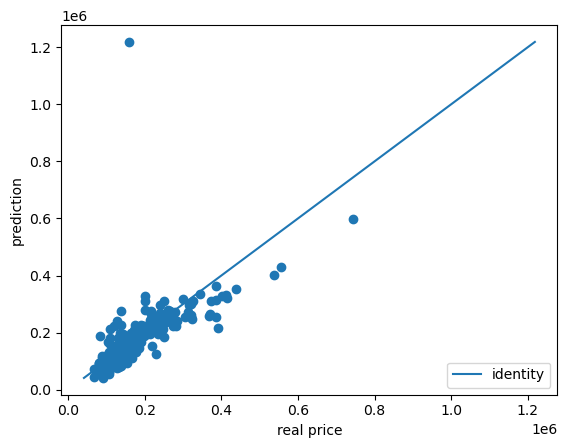

In [13]:
# 高次元特徴量を追加する (2次元)
X_train2 = np.concatenate([X_train, X_train ** 2], axis=1)
X_valid2 = np.concatenate([X_valid, X_valid ** 2], axis=1)

# 標準化
scaler = StandardScaler()
scaler.fit(X_train2)
X_train_std2 = scaler.transform(X_train2)
X_valid_std2 = scaler.transform(X_valid2)

# 学習
reg = ScratchLinearRegression(num_iter=200, lr=0.02)
reg.fit(X_train_std2, y_train, X_valid_std2, y_valid)
y_pred = reg.predict(X_valid_std2)

# プロット
plt.scatter(y_valid, y_pred)
plt.xlabel("real price")
plt.ylabel("prediction")
mx = float(max(np.max(y_valid), np.max(y_pred)))
mi = float(min(np.min(y_valid), np.min(y_pred)))
plt.plot([mi, mx], [mi, mx], label="identity")
print(reg.val_loss[-1])
plt.legend()
plt.show()

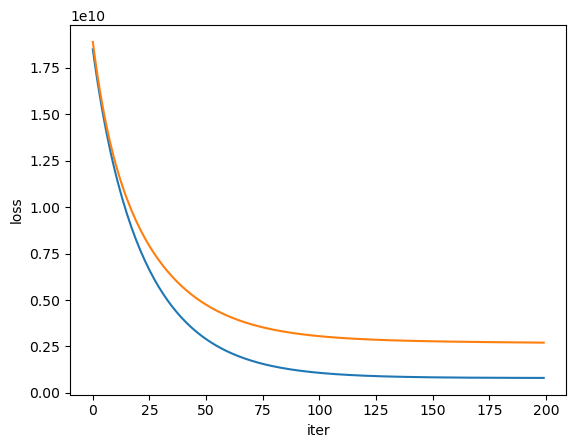

In [14]:
plt.plot(reg.loss)
plt.plot(reg.val_loss)
plt.xlabel("iter")
plt.ylabel("loss")
plt.show()

2乗した特徴量を追加したところ、訓練データでは同程度の誤差に収束したが、検証データの誤差は逆に悪化した。
もとに比べて余計に過学習がなされていると考えられる。

### 【問題10】（アドバンス課題）更新式の導出

最急降下法に従うと、パラメータ $\theta$ は以下のように更新される

$$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j} J(\theta)
$$

損失関数 $J(\theta)$ を2乗誤差とし、更新量 $\frac{\partial}{\partial \theta_j} J(\theta)$ を計算する

$$
\begin{align}
  \frac{\partial}{\partial \theta_j} J(\theta) & = \frac{\partial}{\partial \theta_j} \frac{1}{2m} \sum_{i = 1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 \\
   & = \frac{\partial}{\partial \theta_j} \frac{1}{2m} \sum_{i = 1}^m ((\theta^T x^{(i)})^2 - 2 (\theta^T x^{(i)}) y^{(i)} + (y^{(i)})^2) \\
   & = \frac{1}{2m} (\sum_{i = 1}^m 2 x_j^{(i)} (\theta^T x^{(i)}) - \sum_{i = 1}^m 2 x_j^{(i)} y^{(i)}) \\
   & = \frac{1}{2m} \cdot 2 \sum_{i = 1}^m (x_j^{(i)} (\theta^T x^{(i)}) - x_j^{(i)} y^{(i)}) \\
   & = \frac{1}{m} \sum_{i = 1}^m (\theta^T x^{(i)} - y^{(i)} ) x_j^{(i)} \\
\end{align}
$$

更新量に調整用のハイパーパラメータ $\alpha$ を乗ずることで、実際の更新式となる

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i = 1}^m (\theta^T x^{(i)} - y^{(i)} ) x_j^{(i)}
$$

### 【問題11】（アドバンス課題）局所最適解の問題

平均2乗誤差は、下に凸な放物線を描くため、勾配が0となる点は一番底の最適解となる。
ゆえに、標準化と極端でないハイパーパラメータ選択を行えば、最適解へ収束させることができる。